In [8]:
import scanpy as sc
import pandas as pd
import scvi
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pwd

'C:\\Na\\DFU_Project\\Code'

In [69]:
adata=sc.read_csv('C:\\Na\\DFU_Project\\Data\\Foot skin\\GSM5050523_DFU- healer.csv').T
adata

AnnData object with n_obs × n_vars = 3951 × 18099

In [70]:
adata.obs

""
AAACCTGAGGCAGGTT
AAACCTGAGGGAACGG
AAACCTGAGGTGATTA
AAACCTGAGTTAACGA
AAACCTGCATGTTGAC
...
TTTGTCAGTCAATGTC
TTTGTCAGTCATATCG
TTTGTCAGTGAGGGAG
TTTGTCATCATCTGTT


In [71]:
adata.X.shape

(3951, 18099)

## Doublet removal- optional but preferred

In [72]:
import scvi

In [7]:
adata

AnnData object with n_obs × n_vars = 3951 × 18099

In [73]:
sc.pp.filter_genes(adata, min_cells = 10)

In [74]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [75]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [76]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [09:36<00:00,  1.56s/it, v_num=1, train_loss_step=587, train_loss_epoch=647]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [09:36<00:00,  1.44s/it, v_num=1, train_loss_step=587, train_loss_epoch=647]


In [77]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 319/400:  80%|███████▏ | 319/400 [01:32<00:23,  3.46it/s, v_num=1, train_loss_step=0.399, train_loss_epoch=0.301]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.290. Signaling Trainer to stop.


In [78]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df


,doublet,singlet,prediction
AAACCTGAGGCAGGTT,-1.572482,1.775799,singlet
AAACCTGAGGGAACGG,-0.640120,0.874390,singlet
AAACCTGAGGTGATTA,-1.773188,1.454741,singlet
AAACCTGAGTTAACGA,-1.628611,1.449625,singlet
AAACCTGCATGTTGAC,-1.404709,1.014220,singlet
...,...,...,...
TTTGTCAGTCAATGTC,-0.058641,0.941521,singlet
TTTGTCAGTCATATCG,-1.332050,1.019151,singlet
TTTGTCAGTGAGGGAG,-0.611355,0.500164,singlet
TTTGTCATCATCTGTT,-0.718379,0.541062,singlet


In [79]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,436,436
singlet,3515,3515


In [80]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCTGAGGCAGGTT,-1.572482,1.775799,singlet,-3.348281
AAACCTGAGGGAACGG,-0.640120,0.874390,singlet,-1.514511
AAACCTGAGGTGATTA,-1.773188,1.454741,singlet,-3.227929
AAACCTGAGTTAACGA,-1.628611,1.449625,singlet,-3.078237
AAACCTGCATGTTGAC,-1.404709,1.014220,singlet,-2.418929
...,...,...,...,...
TTTGTCAGTCAATGTC,-0.058641,0.941521,singlet,-1.000162
TTTGTCAGTCATATCG,-1.332050,1.019151,singlet,-2.351202
TTTGTCAGTGAGGGAG,-0.611355,0.500164,singlet,-1.111519
TTTGTCATCATCTGTT,-0.718379,0.541062,singlet,-1.259442


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


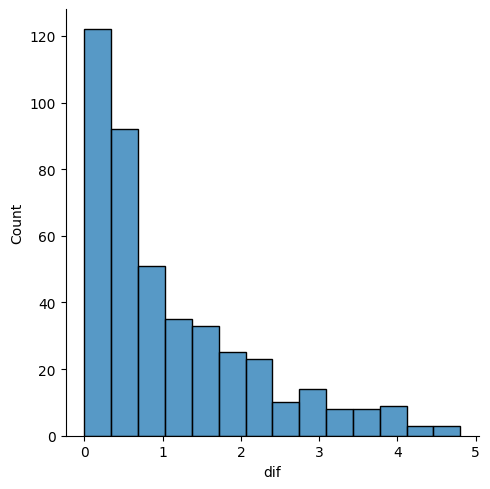

In [82]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [83]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
AAACGGGTCAACACCA,1.303689,-0.605795,doublet,1.909483
AAAGATGGTTCAGGCC,0.515669,-0.496778,doublet,1.012447
AAAGCAAGTGTGGCTC,1.942930,-1.570364,doublet,3.513295
AAAGTAGGTGTAATGA,0.275609,-0.725987,doublet,1.001596
AACTCTTCAATGAATG,1.926197,-1.291628,doublet,3.217825
...,...,...,...,...
TTGTAGGCAGATCGGA,0.827962,-0.403626,doublet,1.231588
TTTACTGAGACTTGAA,1.669833,-1.862783,doublet,3.532616
TTTCCTCAGACAGACC,0.917351,-0.385091,doublet,1.302442
TTTCCTCTCAAACGGG,0.822521,-0.243079,doublet,1.065599


In [84]:
adata

AnnData object with n_obs × n_vars = 3951 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [85]:
adata_reLoad=sc.read_csv('C:\\Na\\DFU_Project\\Data\\Foot skin\\GSM5050523_DFU- healer.csv').T

In [86]:
adata_reLoad.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [87]:
adata_reLoad.obs

,doublet
AAACCTGAGGCAGGTT,False
AAACCTGAGGGAACGG,False
AAACCTGAGGTGATTA,False
AAACCTGAGTTAACGA,False
AAACCTGCATGTTGAC,False
...,...
TTTGTCAGTCAATGTC,False
TTTGTCAGTCATATCG,False
TTTGTCAGTGAGGGAG,False
TTTGTCATCATCTGTT,False


In [88]:
adata_reMoveDoublet = adata_reLoad[~adata_reLoad.obs.doublet] #the~ mean you keep the False

In [90]:
adata_reLoad

AnnData object with n_obs × n_vars = 3951 × 18099
    obs: 'doublet'

In [89]:
adata_reMoveDoublet

View of AnnData object with n_obs × n_vars = 3775 × 18099
    obs: 'doublet'

# # Preprocessing

In [91]:
adata_reMoveDoublet.var[adata_reMoveDoublet.var.index.str.startswith('MT-')] #gene name

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [108]:
adata_reMoveDoublet.var['mt'] = adata_reMoveDoublet.var.index.str.startswith('MT-') #mitochondria
adata_reMoveDoublet.var

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False
AL669831.5,False,False,148,0.041589,96.079470,157.0,148,False
FAM87B,False,False,10,0.002649,99.735099,10.0,10,False
LINC00115,False,False,35,0.009272,99.072848,35.0,35,False
FAM41C,False,False,22,0.005828,99.417219,22.0,22,False
...,...,...,...,...,...,...,...,...
AL592183.1,False,False,37,0.009801,99.019868,37.0,37,False
AC007325.4,False,False,218,0.063311,94.225166,239.0,218,False
AL354822.1,False,False,9,0.002384,99.761589,9.0,9,False
AC004556.1,False,False,585,0.197616,84.503311,746.0,585,False


In [5]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

In [6]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [111]:
adata_reMoveDoublet.var['ribo'] = adata_reMoveDoublet.var_names.isin(ribo_genes[0].values)


In [112]:
adata_reMoveDoublet.var

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False
AL669831.5,False,False,148,0.041589,96.079470,157.0,148,False
FAM87B,False,False,10,0.002649,99.735099,10.0,10,False
LINC00115,False,False,35,0.009272,99.072848,35.0,35,False
FAM41C,False,False,22,0.005828,99.417219,22.0,22,False
...,...,...,...,...,...,...,...,...
AL592183.1,False,False,37,0.009801,99.019868,37.0,37,False
AC007325.4,False,False,218,0.063311,94.225166,239.0,218,False
AL354822.1,False,False,9,0.002384,99.761589,9.0,9,False
AC004556.1,False,False,585,0.197616,84.503311,746.0,585,False


In [113]:
adata_reMoveDoublet.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
AAACCTGAGGCAGGTT,False,1016,2224.0,93.0,4.181655,325.0,14.613310
AAACCTGAGGGAACGG,False,1460,3218.0,167.0,5.189559,604.0,18.769423
AAACCTGAGGTGATTA,False,966,1785.0,81.0,4.537815,297.0,16.638657
AAACCTGAGTTAACGA,False,1367,2545.0,90.0,3.536346,312.0,12.259332
AAACCTGCATGTTGAC,False,972,2019.0,82.0,4.061417,440.0,21.792967
...,...,...,...,...,...,...,...
TTTGTCAGTCAATGTC,False,3301,19059.0,639.0,3.352747,6311.0,33.112965
TTTGTCAGTCATATCG,False,1098,2021.0,72.0,3.562593,278.0,13.755566
TTTGTCAGTGAGGGAG,False,2109,6162.0,142.0,2.304447,1056.0,17.137293
TTTGTCATCATCTGTT,False,2484,7150.0,137.0,1.916084,1210.0,16.923077


In [114]:
sc.pp.calculate_qc_metrics(adata_reMoveDoublet, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True) #callacular qc matrix


In [115]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False
LINC00276,False,False,3,0.000795,99.920530,3.0,3,False
AL031775.2,False,False,3,0.000795,99.920530,3.0,3,False
AC073133.2,False,False,3,0.000795,99.920530,3.0,3,False
PIPOX,False,False,3,0.000795,99.920530,3.0,3,False
...,...,...,...,...,...,...,...,...
RPL41,False,True,3751,35.978542,0.635762,135819.0,3751,False
RPLP1,False,True,3756,34.356823,0.503311,129697.0,3756,False
RPL10,False,True,3762,41.468346,0.344371,156543.0,3762,False
B2M,False,False,3762,38.600796,0.344371,145718.0,3762,False


In [116]:
adata_reMoveDoublet.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
AAACCTGAGGCAGGTT,False,1016,2224.0,93.0,4.181655,325.0,14.613310,93.0,4.181655
AAACCTGAGGGAACGG,False,1460,3218.0,167.0,5.189559,604.0,18.769423,167.0,5.189559
AAACCTGAGGTGATTA,False,966,1785.0,81.0,4.537815,297.0,16.638657,81.0,4.537815
AAACCTGAGTTAACGA,False,1367,2545.0,90.0,3.536346,312.0,12.259332,90.0,3.536346
AAACCTGCATGTTGAC,False,972,2019.0,82.0,4.061417,440.0,21.792967,82.0,4.061417
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCAATGTC,False,3300,19058.0,639.0,3.352747,6311.0,33.114700,639.0,3.352923
TTTGTCAGTCATATCG,False,1098,2021.0,72.0,3.562593,278.0,13.755566,72.0,3.562593
TTTGTCAGTGAGGGAG,False,2109,6162.0,142.0,2.304447,1056.0,17.137293,142.0,2.304447
TTTGTCATCATCTGTT,False,2483,7149.0,137.0,1.916084,1210.0,16.925444,137.0,1.916352


In [117]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')


,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False
LINC00276,False,False,3,0.000795,99.920530,3.0,3,False
AL031775.2,False,False,3,0.000795,99.920530,3.0,3,False
AC073133.2,False,False,3,0.000795,99.920530,3.0,3,False
PIPOX,False,False,3,0.000795,99.920530,3.0,3,False
...,...,...,...,...,...,...,...,...
RPL41,False,True,3751,35.978542,0.635762,135819.0,3751,False
RPLP1,False,True,3756,34.356823,0.503311,129697.0,3756,False
RPL10,False,True,3762,41.468346,0.344371,156543.0,3762,False
B2M,False,False,3762,38.600796,0.344371,145718.0,3762,False


In [118]:
sc.pp.filter_genes(adata_reMoveDoublet, min_cells=3)

In [119]:
adata_reMoveDoublet.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
AAACCTGAGGCAGGTT,False,1016,2224.0,93.0,4.181655,325.0,14.613310,93.0,4.181655
AAACCTGAGGGAACGG,False,1460,3218.0,167.0,5.189559,604.0,18.769423,167.0,5.189559
AAACCTGAGGTGATTA,False,966,1785.0,81.0,4.537815,297.0,16.638657,81.0,4.537815
AAACCTGAGTTAACGA,False,1367,2545.0,90.0,3.536346,312.0,12.259332,90.0,3.536346
AAACCTGCATGTTGAC,False,972,2019.0,82.0,4.061417,440.0,21.792967,82.0,4.061417
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCAATGTC,False,3300,19058.0,639.0,3.352747,6311.0,33.114700,639.0,3.352923
TTTGTCAGTCATATCG,False,1098,2021.0,72.0,3.562593,278.0,13.755566,72.0,3.562593
TTTGTCAGTGAGGGAG,False,2109,6162.0,142.0,2.304447,1056.0,17.137293,142.0,2.304447
TTTGTCATCATCTGTT,False,2483,7149.0,137.0,1.916084,1210.0,16.925444,137.0,1.916352


In [120]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')
# adata_reMoveDoublet.obs.sort_values('pct_counts_ribo')


,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False
LINC00276,False,False,3,0.000795,99.920530,3.0,3,False
AL031775.2,False,False,3,0.000795,99.920530,3.0,3,False
AC073133.2,False,False,3,0.000795,99.920530,3.0,3,False
PIPOX,False,False,3,0.000795,99.920530,3.0,3,False
...,...,...,...,...,...,...,...,...
RPL41,False,True,3751,35.978542,0.635762,135819.0,3751,False
RPLP1,False,True,3756,34.356823,0.503311,129697.0,3756,False
RPL10,False,True,3762,41.468346,0.344371,156543.0,3762,False
B2M,False,False,3762,38.600796,0.344371,145718.0,3762,False


In [122]:
adata_reMoveDoublet.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
GTACTCCGTAAAGTCA,False,330,501.0,0.0,0.000000,150.0,29.940119,0.0,0.000000
ATTGGACTCTCAAACG,False,366,501.0,0.0,0.000000,80.0,15.968063,0.0,0.000000
CGGCTAGTCTGCCAGG,False,299,506.0,24.0,4.743083,74.0,14.624506,24.0,4.743083
GGTATTGTCGTAGGAG,False,345,514.0,5.0,0.972763,89.0,17.315174,5.0,0.972763
CTGATCCCAGCTCGAC,False,322,516.0,38.0,7.364341,83.0,16.085272,38.0,7.364341
...,...,...,...,...,...,...,...,...,...
TCGTAGACACGTGAGA,False,4862,45457.0,1439.0,3.165629,12844.0,28.255276,1439.0,3.165629
CGAGCACAGGCTATCT,False,5095,45752.0,1469.0,3.210719,14300.0,31.255463,1469.0,3.210788
ATCATGGCACTATCTT,False,4772,52176.0,1613.0,3.091400,20356.0,39.014107,1613.0,3.091460
ACGGCCAGTCAACATC,False,4958,52898.0,1918.0,3.625846,14226.0,26.893267,1918.0,3.625846


In [41]:
#sc.pp.filter_cells(adata, min_genes=200)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


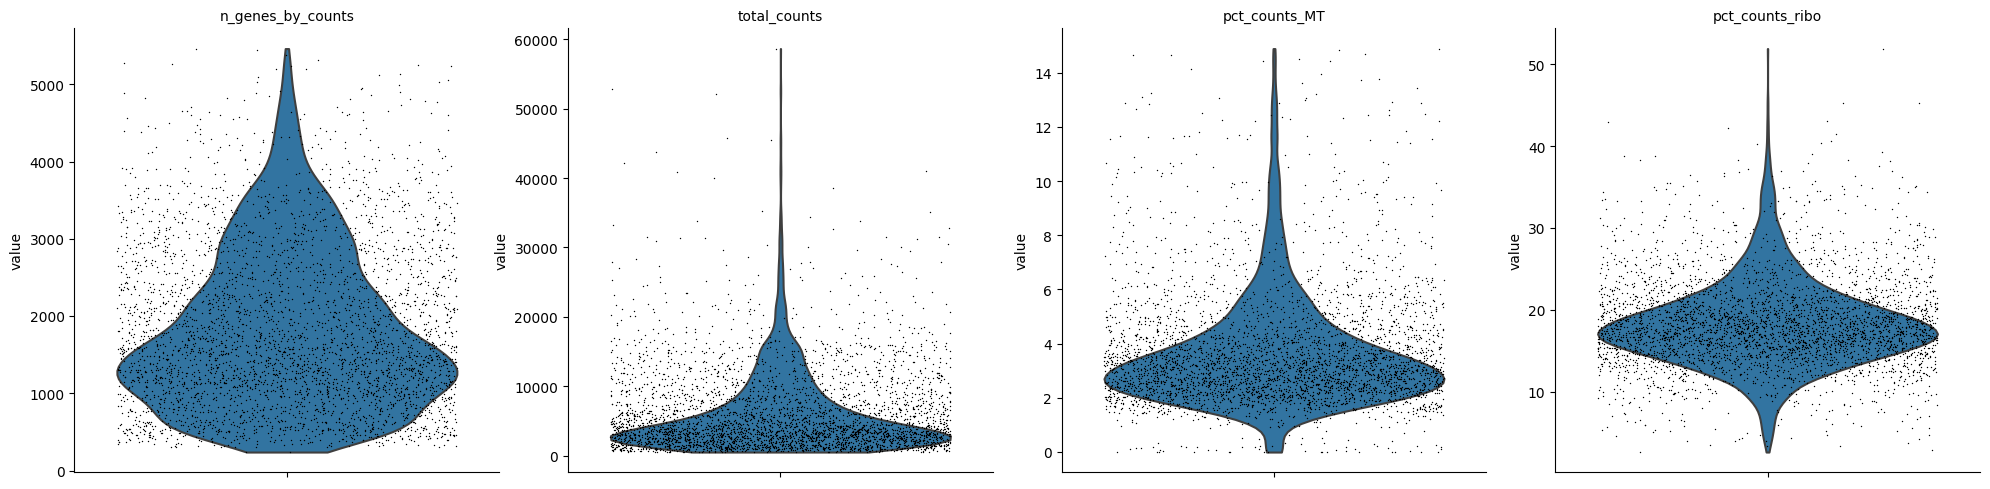

In [123]:
sc.pl.violin(adata_reMoveDoublet, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True) #QC

## import numpy as np

In [126]:
upper_lim = np.quantile(adata_reMoveDoublet.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [127]:
upper_lim

4350.36

In [128]:
adata_lim = adata_reMoveDoublet[adata_reMoveDoublet.obs.n_genes_by_counts < upper_lim]

In [129]:
adata_lim.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
AAACCTGAGGCAGGTT,False,1016,2224.0,93.0,4.181655,325.0,14.613310,93.0,4.181655
AAACCTGAGGGAACGG,False,1460,3218.0,167.0,5.189559,604.0,18.769423,167.0,5.189559
AAACCTGAGGTGATTA,False,966,1785.0,81.0,4.537815,297.0,16.638657,81.0,4.537815
AAACCTGAGTTAACGA,False,1367,2545.0,90.0,3.536346,312.0,12.259332,90.0,3.536346
AAACCTGCATGTTGAC,False,972,2019.0,82.0,4.061417,440.0,21.792967,82.0,4.061417
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCAATGTC,False,3300,19058.0,639.0,3.352747,6311.0,33.114700,639.0,3.352923
TTTGTCAGTCATATCG,False,1098,2021.0,72.0,3.562593,278.0,13.755566,72.0,3.562593
TTTGTCAGTGAGGGAG,False,2109,6162.0,142.0,2.304447,1056.0,17.137293,142.0,2.304447
TTTGTCATCATCTGTT,False,2483,7149.0,137.0,1.916084,1210.0,16.925444,137.0,1.916352


In [131]:
adata_mt_filter_20 = adata_lim[adata_lim.obs.pct_counts_MT < 20]

In [136]:
#adata_ribo_filter_2 = adata_lim[adata_lim.obs.pct_counts_ribo < 2]

# # Normalization

In [137]:
adata_mt_filter_20.X.sum(axis=1)

array([2224., 3218., 1785., ..., 6162., 7149., 8321.], dtype=float32)

In [138]:
sc.pp.normalize_total(adata_mt_filter_20, target_sum=1e4) #normalize every cell to 10,000 UMI

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [139]:
adata_mt_filter_20.X.sum(axis = 1)

array([10000.001, 10000.   , 10000.   , ..., 10000.   ,  9999.999,
       10000.   ], dtype=float32)

In [140]:
sc.pp.log1p(adata_mt_filter_20) #change to log counts

In [141]:
adata_mt_filter_20.X.sum(axis = 1)

array([2056.609 , 2531.324 , 2096.538 , ..., 2835.4844, 3042.7869,
       3245.9573], dtype=float32)

In [142]:
adata_raw = adata_mt_filter_20

## Clustering: you can skip to intergration if you have more than one sample, but there is still some useful infor 

In [143]:
sc.pp.highly_variable_genes(adata_raw, n_top_genes = 2000)


In [144]:
adata_raw.var

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,3,0.000795,99.920530,3.0,3,False,False,0.001041,0.368500,-1.729651
AL669831.5,False,False,148,0.041589,96.079470,157.0,148,False,False,0.088011,1.120388,-0.255902
FAM87B,False,False,10,0.002649,99.735099,10.0,10,False,False,0.005696,0.994727,-0.502207
LINC00115,False,False,35,0.009272,99.072848,35.0,35,False,False,0.019101,1.546762,0.579819
FAM41C,False,False,22,0.005828,99.417219,22.0,22,False,False,0.009169,0.807808,-0.868580
...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,False,False,37,0.009801,99.019868,37.0,37,False,False,0.021235,1.246039,-0.009618
AC007325.4,False,False,218,0.063311,94.225166,239.0,218,False,False,0.107460,1.232803,-0.035561
AL354822.1,False,False,9,0.002384,99.761589,9.0,9,False,False,0.003012,0.815815,-0.852886
AC004556.1,False,False,585,0.197616,84.503311,746.0,585,False,False,0.249548,1.102285,-0.291386


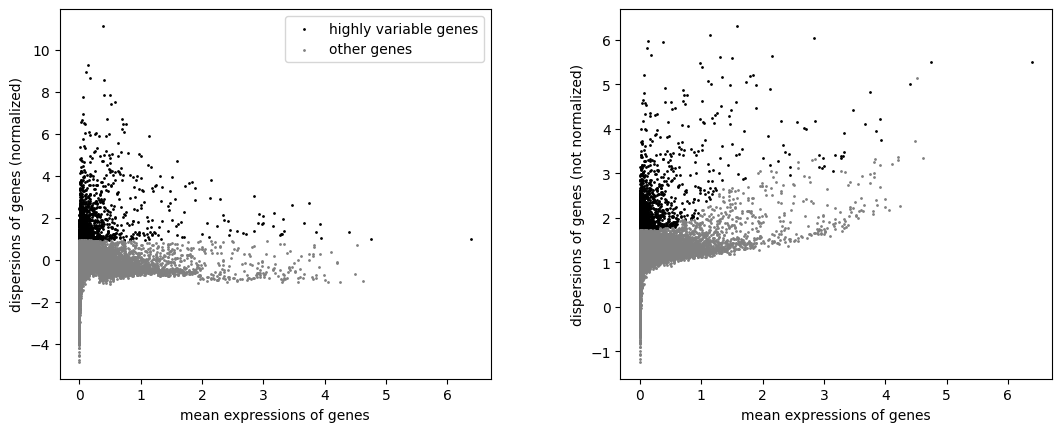

In [145]:
sc.pl.highly_variable_genes(adata_raw)

In [147]:
adata_top_gene = adata_raw[:, adata_raw.var.highly_variable]

In [148]:
sc.pp.regress_out(adata_top_gene, ['total_counts', 'pct_counts_MT', 'pct_counts_ribo'])


In [149]:
sc.pp.scale(adata_top_gene, max_value=10)


In [150]:
sc.tl.pca(adata_top_gene, svd_solver='arpack')


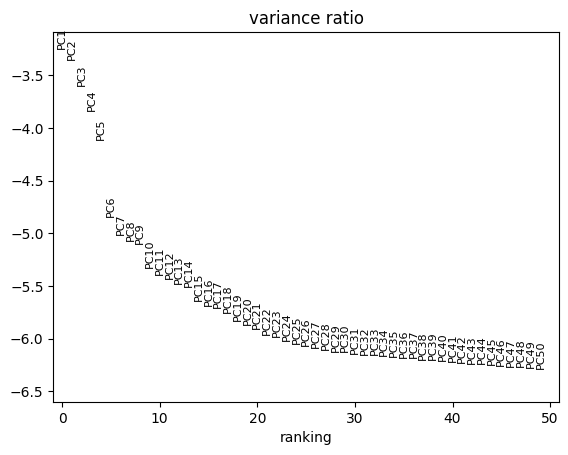

In [151]:
sc.pl.pca_variance_ratio(adata_top_gene, log=True, n_pcs = 50)


In [152]:
sc.pp.neighbors(adata_top_gene, n_pcs = 30)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\umap\distanc

In [153]:
adata_top_gene.obsp['distances'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
sc.tl.umap(adata_top_gene)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


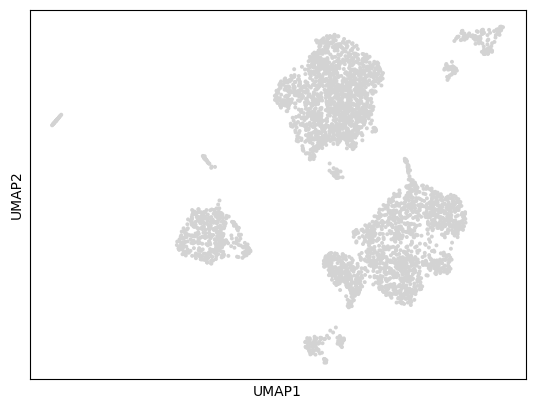

In [160]:
sc.pl.umap(adata_top_gene)

In [159]:
sc.tl.leiden(adata_top_gene, resolution = 0.5)

In [158]:
adata_top_gene.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGGCAGGTT,False,1016,2224.0,93.0,4.181655,325.0,14.613310,93.0,4.181655,0
AAACCTGAGGGAACGG,False,1460,3218.0,167.0,5.189559,604.0,18.769423,167.0,5.189559,4
AAACCTGAGGTGATTA,False,966,1785.0,81.0,4.537815,297.0,16.638657,81.0,4.537815,2
AAACCTGAGTTAACGA,False,1367,2545.0,90.0,3.536346,312.0,12.259332,90.0,3.536346,0
AAACCTGCATGTTGAC,False,972,2019.0,82.0,4.061417,440.0,21.792967,82.0,4.061417,2
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCAATGTC,False,3300,19058.0,639.0,3.352747,6311.0,33.114700,639.0,3.352923,10
TTTGTCAGTCATATCG,False,1098,2021.0,72.0,3.562593,278.0,13.755566,72.0,3.562593,2
TTTGTCAGTGAGGGAG,False,2109,6162.0,142.0,2.304447,1056.0,17.137293,142.0,2.304447,2
TTTGTCATCATCTGTT,False,2483,7149.0,137.0,1.916084,1210.0,16.925444,137.0,1.916352,2


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


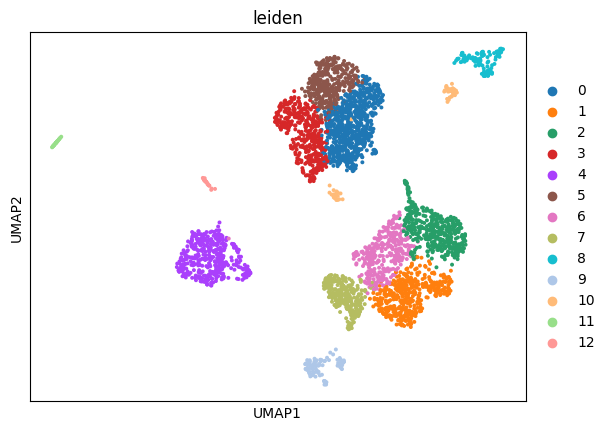

In [161]:
sc.pl.umap(adata_top_gene,color=['leiden'])

In [2]:
def pp(csv_path):
    new_adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(new_adata, min_cells = 10)
    sc.pp.highly_variable_genes(new_adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(new_adata)
    vae = scvi.model.SCVI(new_adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    new_adata = sc.read_csv(csv_path).T
    new_adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    new_adata.obs['doublet'] = new_adata.obs.index.isin(doublets.index)
    new_adata = new_adata[~new_adata.obs.doublet]
    
    
    sc.pp.filter_cells(new_adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(new_adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    new_adata.var['mt'] = new_adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    new_adata.var['ribo'] = new_adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(new_adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(new_adata.obs.n_genes_by_counts.values, .98)
    new_adata = new_adata[new_adata.obs.n_genes_by_counts < upper_lim]
    new_adata = new_adata[new_adata.obs.pct_counts_mt < 20]

    return new_adata

In [9]:
out = []
file_path = 'C:\\Na\\DFU_Project\\Data\\TestIntegrationSmallData\\'
for file in os.listdir(file_path):
    out.append(pp( file_path + file))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\lightning\pytorch\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 400/400: 100%|█████████████| 400/400 [02:42<00:00,  2.47it/s, v_num=1, train_loss_step=681, train_loss_epoch=671]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [02:42<00:00,  2.46it/s, v_num=1, train_loss_step=681, train_loss_epoch=671]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 303/400:  76%|██████▊  | 303/400 [00:22<00:07, 13.42it/s, v_num=1, train_loss_step=0.353, train_loss_epoch=0.272]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.330. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [09:53<00:00,  1.51s/it, v_num=1, train_loss_step=668, train_loss_epoch=639]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [09:53<00:00,  1.48s/it, v_num=1, train_loss_step=668, train_loss_epoch=639]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 391/400:  98%|████████▊| 391/400 [01:47<00:02,  3.62it/s, v_num=1, train_loss_step=0.187, train_loss_epoch=0.304]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.285. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\lightning\pytorch\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 400/400: 100%|█████████████| 400/400 [01:23<00:00,  4.46it/s, v_num=1, train_loss_step=734, train_loss_epoch=772]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [01:23<00:00,  4.79it/s, v_num=1, train_loss_step=734, train_loss_epoch=772]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 123/400:  31%|██▊      | 123/400 [00:05<00:11, 23.16it/s, v_num=1, train_loss_step=0.399, train_loss_epoch=0.306]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.309. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [07:07<00:00,  1.07s/it, v_num=1, train_loss_step=756, train_loss_epoch=730]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [07:07<00:00,  1.07s/it, v_num=1, train_loss_step=756, train_loss_epoch=730]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 375/400:  94%|████████▍| 375/400 [01:12<00:04,  5.21it/s, v_num=1, train_loss_step=0.243, train_loss_epoch=0.295]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.297. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [05:47<00:00,  1.14it/s, v_num=1, train_loss_step=755, train_loss_epoch=590]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [05:47<00:00,  1.15it/s, v_num=1, train_loss_step=755, train_loss_epoch=590]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 245/400:  61%|█████▌   | 245/400 [00:37<00:23,  6.52it/s, v_num=1, train_loss_step=0.402, train_loss_epoch=0.323]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.286. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [11:18<00:00,  1.70s/it, v_num=1, train_loss_step=644, train_loss_epoch=670]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [11:18<00:00,  1.70s/it, v_num=1, train_loss_step=644, train_loss_epoch=670]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 321/400:  80%|███████▏ | 321/400 [01:39<00:24,  3.24it/s, v_num=1, train_loss_step=0.155, train_loss_epoch=0.269]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.260. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [12:22<00:00,  1.83s/it, v_num=1, train_loss_step=553, train_loss_epoch=605]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [12:22<00:00,  1.86s/it, v_num=1, train_loss_step=553, train_loss_epoch=605]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 290/400:  72%|███████▎  | 290/400 [01:38<00:37,  2.94it/s, v_num=1, train_loss_step=0.35, train_loss_epoch=0.267]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.256. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [14:44<00:00,  2.25s/it, v_num=1, train_loss_step=573, train_loss_epoch=594]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [14:44<00:00,  2.21s/it, v_num=1, train_loss_step=573, train_loss_epoch=594]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 287/400:  72%|██████▍  | 287/400 [01:50<00:43,  2.59it/s, v_num=1, train_loss_step=0.186, train_loss_epoch=0.242]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.210. Signaling Trainer to stop.


C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [10]:
out [0]

View of AnnData object with n_obs × n_vars = 965 × 14364
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
adata_integrate = sc.concat(out)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [12]:
adata_integrate

AnnData object with n_obs × n_vars = 24630 × 12168
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [13]:
sc.pp.filter_genes(adata_integrate, min_cells = 10)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata_integrate.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from scipy.sparse import csr_matrix

In [16]:
adata_integrate.X = csr_matrix(adata_integrate.X)

In [17]:
adata_integrate.X


<24630x12168 sparse matrix of type '<class 'numpy.float32'>'
	with 40115534 stored elements in Compressed Sparse Row format>

In [18]:
adata_integrate.write_h5ad('combined.h5ad')

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [19]:
adata_integrate = sc.read_h5ad('combined.h5ad')

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
adata_integrate.obs.groupby('Sample').count()

,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
Small,24630,24630,24630,24630,24630,24630,24630,24630


In [21]:
sc.pp.filter_genes(adata_integrate, min_cells = 100)

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
adata_integrate

AnnData object with n_obs × n_vars = 24630 × 12115
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [23]:
adata_integrate.layers['counts'] = adata_integrate.X.copy()

In [24]:
sc.pp.normalize_total(adata_integrate, target_sum = 1e4)
sc.pp.log1p(adata_integrate)
adata_integrate.raw = adata_integrate

In [25]:
adata_integrate.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCTGCATGTAAGA,Small,False,1109,1109,2493.0,0.0,0.0,575.0,23.064581
AAACCTGGTGTGACGA,Small,False,832,832,1487.0,0.0,0.0,297.0,19.973101
AAACGGGAGGCTACGA,Small,False,2730,2730,9072.0,0.0,0.0,1387.0,15.288800
AAACGGGTCTTGTTTG,Small,False,1501,1501,3134.0,0.0,0.0,772.0,24.633057
AAAGATGGTCAGAGGT,Small,False,1078,1078,2467.0,0.0,0.0,523.0,21.199837


In [26]:
adata_integrate

AnnData object with n_obs × n_vars = 24630 × 12115
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [27]:
scvi.model.SCVI.setup_anndata(adata_integrate, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [28]:
model = scvi.model.SCVI(adata_integrate)

In [30]:
model.train() #may take a while without GPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/325:   0%|                                                                             | 0/325 [00:00<?, ?it/s]

C:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\lightning\pytorch\trainer\call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
